In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pickle as pkl
%matplotlib inline

In [2]:
#!rsync -au hoangtha@faramir.it.deakin.edu.au:/home/hoangtha/github/gan_stability/output/imagenet_TTUR/ .

In [3]:
root = '/home/thanhtung/Desktop/'
log_0gp = root + './imagenet_GAN0GP/logs/stats.p'
log_0gp_ttur = root + './imagenet_TTUR/logs/stats.p' 
log_0real = root + './imagenet_0real/logs/stats.p'
log_0real_ttur = root + './imagenet_0real_TTUR/logs/stats.p'
log_wgangp5_ttur = root + './imagenet_wgangp5_TTUR/logs/stats.p'
log_wgan0gp5_ttur = root + './imagenet_wgan0gp5_TTUR/logs/stats.p'
log_wgan0gp5_100_ttur = root + './imagenet_wgan0gp5_lambda100_TTUR/logs/stats.p'
log_wgan0gp5_500_ttur = root + './imagenet_wgan0gp5_lambda500_TTUR/logs/stats.p'

def load_inception(file, length=100):
    with open(file, 'rb') as f:
        stats = pkl.load(f)
        inception = stats['inception_score']
    return np.array(inception['mean'])[:length], np.array(inception['stddev'])[:length]

inception_0gp_mean, inception_0gp_stddev = load_inception(log_0gp)
inception_0gp_ttur_mean, inception_0gp_ttur_stddev = load_inception(log_0gp_ttur)
inception_0real_mean, inception_0real_stddev = load_inception(log_0real)
inception_0real_ttur_mean, inception_0real_ttur_stddev = load_inception(log_0real_ttur)
inception_wgangp5_ttur_mean, inception_wgangp5_ttur_stddev = load_inception(log_wgangp5_ttur)
inception_wgan0gp5_ttur_mean, inception_wgan0gp5_ttur_stddev = load_inception(log_wgan0gp5_ttur)
inception_wgan0gp5_100_ttur_mean, inception_wgan0gp5_100_ttur_stddev = load_inception(log_wgan0gp5_100_ttur)
inception_wgan0gp5_500_ttur_mean, inception_wgan0gp5_500_ttur_stddev = load_inception(log_wgan0gp5_500_ttur)

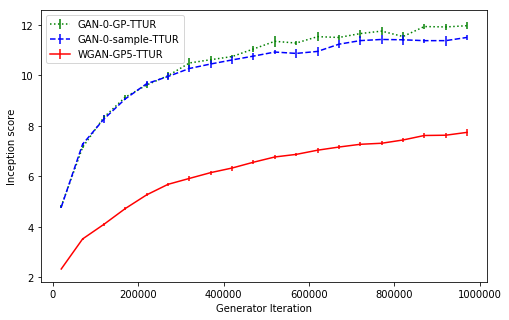

In [4]:
start = 1
step = 5
fig, ax = plt.subplots(1, 1,figsize=(8, 5))

x = np.arange(len(inception_0gp_ttur_mean)) * 10000 + 10000
i0gp_ttur = ax.errorbar(x[start::step], inception_0gp_ttur_mean[start::step, 1], inception_0gp_ttur_stddev[start::step, 1], c='g', linestyle=':', label='GAN-0-GP-TTUR')

x = np.arange(len(inception_0real_ttur_mean)) * 10000 + 10000
i0real_ttur = ax.errorbar(x[start::step], inception_0real_ttur_mean[start::step, 1], inception_0real_ttur_stddev[start::step, 1], c='b', linestyle='--', label='GAN-0-sample-TTUR')

# x = np.arange(len(inception_0real_mean)) * 10000
# i0real = ax.errorbar(x, inception_0real_mean[:, 1], inception_0real_stddev[:, 1], c='k', label='GAN-0real')

x = np.arange(len(inception_wgangp5_ttur_mean)) * 10000 + 10000
iwgangp5_ttur = ax.errorbar(x[start::step], inception_wgangp5_ttur_mean[start::step, 1], inception_wgangp5_ttur_stddev[start::step, 1], c='r', linestyle='-', label='WGAN-GP5-TTUR')

# x = np.arange(len(inception_wgan0gp5_ttur_mean)) * 10000 + 10000
# iwgan0gp5_ttur = ax.errorbar(x[start::step], inception_wgan0gp5_ttur_mean[start::step, 1], inception_wgan0gp5_ttur_stddev[start::step, 1], c='m', linestyle='-.', label='WGAN-0-GP5-TTUR')

#x = np.arange(len(inception_wgan0gp5_100_ttur_mean)) * 10000 + 10000
#iwgan0gp5_100_ttur = ax.errorbar(x[start::step], inception_wgan0gp5_100_ttur_mean[start::step, 1], inception_wgan0gp5_100_ttur_stddev[start::step, 1], c='y', linestyle='-.', label='WGAN-0-GP5-100-TTUR')

# x = np.arange(len(inception_wgan0gp5_500_ttur_mean)) * 10000 + 10000
# iwgan0gp5_500_ttur = ax.errorbar(x[start::step], inception_wgan0gp5_500_ttur_mean[start::step, 1], inception_wgan0gp5_500_ttur_stddev[start::step, 1], c='y', linestyle='-.', label='WGAN-0-GP5-500-TTUR')

ax.set_xlabel('Generator Iteration')
ax.set_ylabel('Inception score')
ax.legend()
plt.show()
fig.savefig('inception_plot.pdf', bbox_inches='tight')

In [5]:
# max(inception_0gp_mean[:len(inception_0real_ttur_mean), 1])

In [6]:
# max(inception_0gp_ttur_mean[:, 1])

In [7]:
# max(inception_0real_mean[:, 1])

In [8]:
# max(inception_0real_ttur_mean[:len(inception_0gp_ttur_mean), 1])

In [9]:
# (max(inception_0gp_ttur_mean[:, 1]) - max(inception_0real_ttur_mean[:len(inception_0gp_ttur_mean), 1])) / max(inception_0real_ttur_mean[:len(inception_0gp_ttur_mean), 1])

In [10]:
# (max(inception_0gp_mean[:, 1]) - max(inception_0real_ttur_mean[:len(inception_0gp_ttur_mean), 1])) / max(inception_0real_ttur_mean[:len(inception_0gp_ttur_mean), 1])

In [11]:
# import pickle as pkl
# import numpy as np

# log_0gp = './output/imagenet_GAN0GP/logs/stats.p'
# log_0gp_ttur = './output/imagenet_TTUR/logs/stats.p' 
# log_0real = './output/imagenet_0real/logs/stats.p'
# log_0real_ttur = './output/imagenet_0real_TTUR/logs/stats.p'

# def load_inception(file):
#     with open(file, 'rb') as f:
#         stats = pkl.load(f)
#         inception = stats['inception_score']
#     return np.array(inception['mean']), np.array(inception['stddev'])

# try:
#     print('0gp')
#     inception_0gp_mean, inception_0gp_stddev = load_inception(log_0gp)
#     print(len(inception_0gp_mean))
#     print(max(inception_0gp_mean[:, 1]))
# except:
#     print('0gp not available')
# try:
#     print('0gp_ttur')
#     inception_0gp_ttur_mean, inception_0gp_ttur_stddev = load_inception(log_0gp_ttur)
#     print(len(inception_0gp_ttur_mean))
#     print(max(inception_0gp_ttur_mean[:, 1]))
# except:
#     print('0gp_ttur not available')
# try:
#     print('0real')
#     inception_0real_mean, inception_0real_stddev = load_inception(log_0real)
#     print(len(inception_0real_mean))
#     print(max(inception_0real_mean[:, 1]))
# except:
#     print('0real not available')
# try:
#     print('0real_ttur')
#     inception_0real_ttur_mean, inception_0real_ttur_stddev = load_inception(log_0real_ttur)
#     print(len(inception_0real_ttur_mean))
#     print(max(inception_0real_ttur_mean[:, 1]))    
# except:
#     print('0real_ttur not available')